<a href="https://colab.research.google.com/github/JonathanMtz1103987/Mineria-de-Datos/blob/main/Proyecto_Mineria_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Juárez del Estado de Durango**
# **Facultad de Ciencias Exactas**

## **Maestría en Estadística Aplicada**

## Desarrollo y Comparación de Modelos de Aprendizaje Automático para la Clasificación de Tumores Mamarios Bajo el Marco CRISP-DM.

### Nombre del Estudiante: Jonathan Martinez Perez

### Fecha: Durango, DGO. 17 de febrero de 2026

# **Comprensión del Negocio**
## Fase 1: Descripción del Problema

**1.1 Contexto General**

El cáncer de mama constituye una de las principales causas de mortalidad en mujeres a nivel mundial. La detección temprana y el diagnóstico oportuno son factores críticos para mejorar la tasa de supervivencia y reducir la progresión de la enfermedad. En este contexto, los sistemas de apoyo basados en minería de datos y aprendizaje automático representan herramientas potenciales para asistir en la clasificación de tumores como benignos o malignos, contribuyendo a la toma de decisiones clínicas fundamentadas en evidencia cuantitativa.
El presente proyecto tiene como finalidad desarrollar y comparar múltiples modelos de aprendizaje automático para la clasificación de tumores mamarios, utilizando el conjunto de datos Breast Cancer Wisconsin. Se adoptará el modelo metodológico CRISP-DM como marco estructural para el desarrollo del proyecto.

**1.2 Problema del Negocio**

Desde una perspectiva clínica, el problema central radica en minimizar los errores diagnósticos, particularmente los falsos negativos, ya que clasificar erróneamente un tumor maligno como benigno puede tener consecuencias graves para la salud del paciente.

Por lo que el problema de negocio se formula como:

¿Es posible desarrollar un modelo predictivo robusto que clasifique con alta precisión y sensibilidad los tumores mamarios como benignos o malignos, utilizando técnicas avanzadas de minería de datos?

**1.3 Objetivo General**

Desarrollar y evaluar comparativamente múltiples modelos de clasificación supervisada para el diagnóstico de cáncer de mama, identificando el modelo con mejor desempeño predictivo y mayor capacidad de generalización.

**1.4 Objetivos Específicos**

- Analizar exploratoriamente el conjunto de datos y evaluar su calidad.
- Implementar modelos de clasificación lineales, basados en árboles, ensemble y redes neuronales.
- Optimizar hiperparámetros mediante validación cruzada.
- Comparar modelos mediante análisis estadístico formal.
- Analizar la importancia de variables y su interpretación clínica.

**1.5 Alcance del Proyecto**

El proyecto se limita al análisis del dataset Breast Cancer Wisconsin (Diagnóstico), que contiene características numéricas derivadas de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de masas mamarias.

No se incluyen imágenes médicas originales ni datos clínicos adicionales.

**1.6 Criterios de Éxito**

Desde la perspectiva técnica y clínica, el proyecto se considerará exitoso si:

- Se logra una alta sensibilidad (Recall) en la clase maligna.
- Se obtiene un AUC-ROC superior al 0.95.
- Se evidencia bajo sobreajuste (brecha mínima entre entrenamiento y prueba).
- Se identifican variables relevantes coherentes con literatura médica.

**1.7 Impacto Potencial**

La implementación de un modelo predictivo confiable podría contribuir como herramienta de apoyo diagnóstico, mejorando la eficiencia del proceso clínico y reduciendo la probabilidad de errores críticos. Sin embargo, se enfatiza que el modelo no reemplaza el juicio médico, sino que actúa como sistema complementario de apoyo a la decisión.

# **Comprensión de los Datos (Data Understanding)**
## Fase 2: Análisis Exploratorio

**2.1 Origen del Conjunto de Datos**

El conjunto de datos utilizado en este estudio corresponde al Breast Cancer Wisconsin (Diagnostic), documentado en el UCI Machine Learning Repository y disponible a través de Scikit-learn.

El dataset contiene mediciones obtenidas a partir de imágenes digitalizadas de aspiraciones con aguja fina (Fine Needle Aspiration – FNA) de masas mamarias. Estas mediciones describen características del núcleo celular presentes en la imagen.

In [43]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# If needed (Colab):

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, log_loss
)

# Modelos
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, Perceptron,
    PassiveAggressiveClassifier, RidgeClassifier
)
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, HistGradientBoostingClassifier
)

# Cargar dataset
data = load_breast_cancer()

# Convertir a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Descripción General del Dataset
df.shape
df.info()
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


El dataset contiene:

- 569 observaciones
- 30 variables predictoras numéricas
- 1 variable objetivo

La variable objetivo está codificada como:

0 → Maligno

1 → Benigno

Todas las variables predictoras son numéricas continuas (tipo float64).Ademas de que el dataset no presenta valores faltantes. Sin embargo, se aplicará escalamiento de variables debido a la naturaleza de los algoritmos utilizados.

In [44]:
# Estadística Descriptiva
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Se observan diferencias significativas en escalas entre variables como: mean radius, mean area, worst perimeter. Esto justifica la necesidad de aplicar normalización.

In [5]:
# Distribución de Clases
df["target"].value_counts()


,count
target,
1,357
0,212


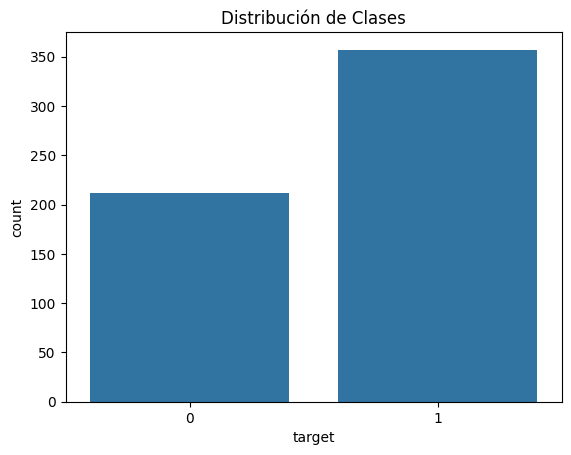

In [6]:
sns.countplot(x="target", data=df)
plt.title("Distribución de Clases")
plt.show()

El dataset presenta una ligera desproporción entre clases, aunque no es severa.

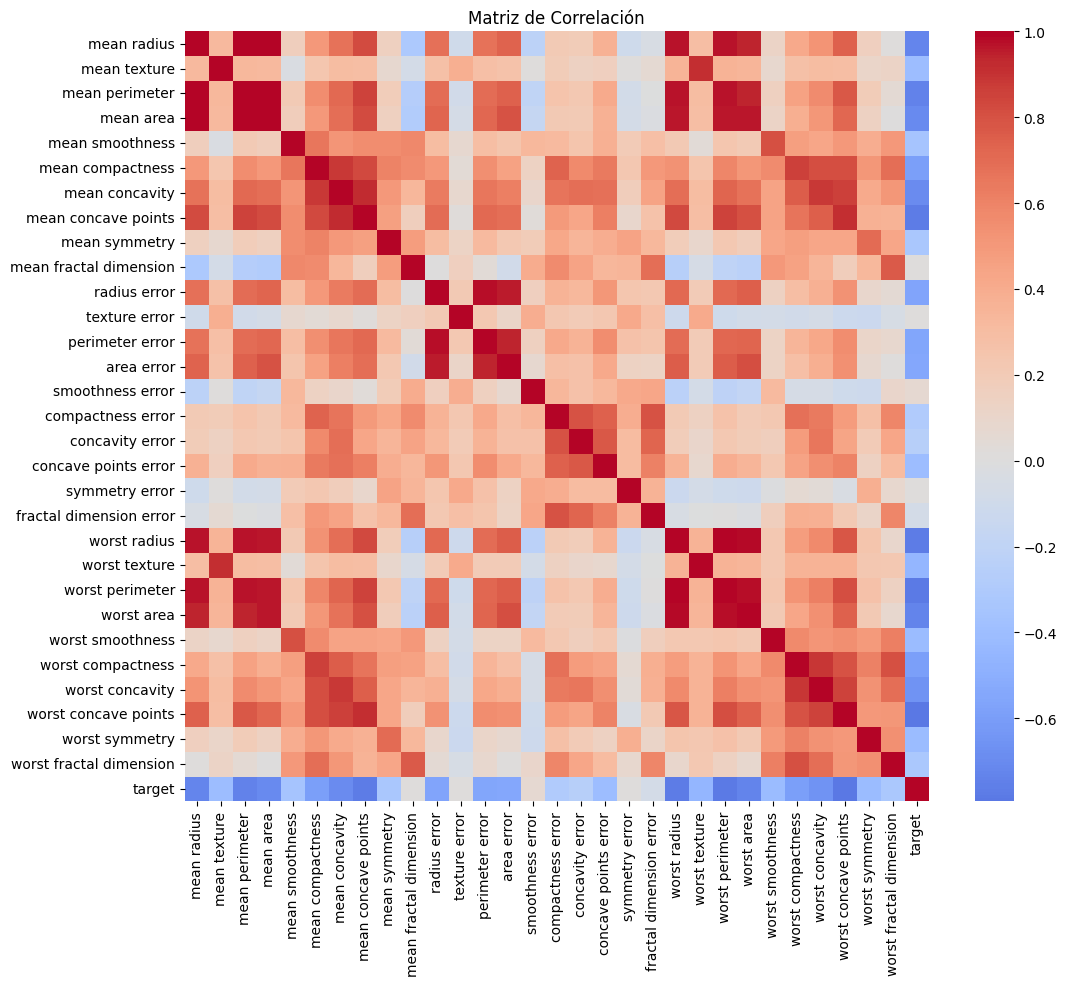

In [7]:
# Análisis de Correlación
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()


Se observa alta correlación entre múltiples variables, especialmente aquellas derivadas de medidas similares (mean, worst, error). Esto quiere decir que es recomendable la regularización (L1 / L2) y una posible reducción de dimensionalidad (PCA).

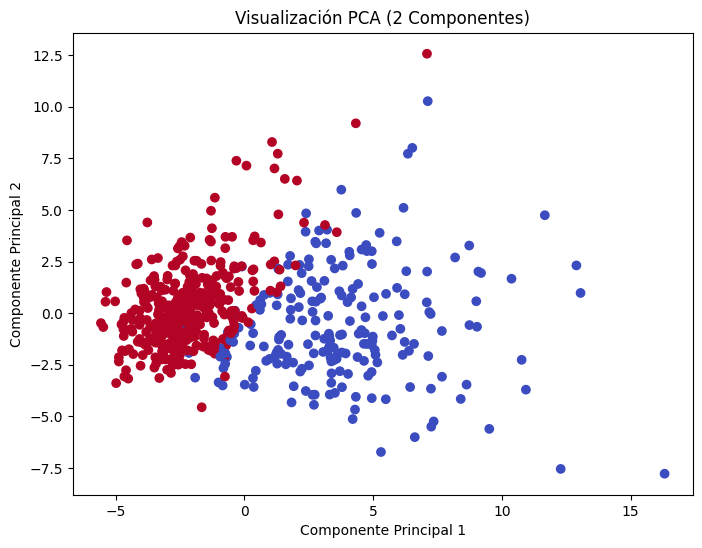

In [8]:
# Visualización con PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm")
plt.title("Visualización PCA (2 Componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Esta visualización sugiere que existe cierta separabilidad entre clases, lo cual es favorable para modelos de clasificación.

# **Preparación de los Datos**
## Fase 3: Preprocesamiento
**3.1 Objetivo de la Fase**

La fase de preparación tiene como propósito transformar el conjunto de datos en un formato adecuado para la modelación, asegurando consistencia, estabilidad numérica y evitando fuga de información (data leakage).

Dado que el dataset no presenta valores faltantes, las principales transformaciones incluirán:

- Separación de variables predictoras y variable objetivo
- División en conjuntos de entrenamiento, validacion y prueba (50%, 25% y 25%)
- Estandarización de variables

In [11]:
# Separacion de variables
X = df.drop("target", axis=1)
y = df["target"]

# Donde:
#X representa la matriz de características.
#y representa la variable diagnóstico (0 = maligno, 1 = benigno).

X.shape, y.shape

# Separacion de los datos
data = load_breast_cancer()
X = data.data
y = data.target

# Primera división: 50% train, 50% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.5,
    stratify=y,
    random_state=42
)

# Segunda división: 25% val, 25% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (284, 30)
Validation: (142, 30)
Test: (143, 30)


## Justificación Metodológica

Esta estrategia nos permite separar claramente el ajuste y la evaluación , así como evitar sobreajuste al conjunto de prueba y seleccionar los hiperparámetros en la validación obteniendo una evaluación final imparcial en el test.

## Normalización Min–Max

Dado que las variables presentan diferentes escalas, se aplica normalización Min–Max para reescalar todas las características al rango [0,1].

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

El preprocesamiento fue integrado dentro de una arquitectura Pipeline para evitar data leakage.

In [12]:
preprocess_minmax = Pipeline([
    ("scaler", MinMaxScaler())
])



## **Modelación (Modeling)**
#Fase 4: Modelado
Dado que el problema es de clasificación binaria supervisada, se realizó comparación sistemática entre 20 algoritmos de clasificación pertenecientes a diferentes familias estadísticas y de aprendizaje automático, permitiendo evaluar diferencias estructurales entre modelos lineales, no lineales y ensemble.

La selección del modelo óptimo se realizará utilizando el conjunto de validación y la evaluación final se realizará exclusivamente sobre el conjunto de prueba.

En los cuales se encuentran estreucturados de la siguiente manera:

 **Modelos Lineales**
- Logistic Regression
- Ridge Classifier
- SGD
- Perceptron
- Passive Aggressive
- Linear SVM

 **Modelos Basados en Distancia**
- kNN

 **Modelos Bayesianos**
- Gaussian NB
- Bernoulli NB
- Multinomial NB

 **Modelos de Árbol**
- Decision Tree

 **Modelos Ensemble**
- Random Forest
- Extra Trees
- Gradient Boosting
- AdaBoost
- Bagging
- HistGradientBoosting

 **Modelos Generativos**
- LDA
- QDA

# 4.1 Modelos Lineales
## Regresión Logística
La regresión logística modela la probabilidad de pertenencia a la clase positiva mediante:

$$
P(Y=1 \mid X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + ... + \beta_n X_n)}}
$$

Se evaluará con regularización L2 inicialmente.


In [19]:
# Entrenamiento con validación
from sklearn.metrics import accuracy_score, roc_auc_score

# Entrenamiento
pipe_logistic.fit(X_train, y_train)

# Predicciones
y_val_pred = pipe_logistic.predict(X_val)
y_val_proba = pipe_logistic.predict_proba(X_val)[:,1]

# Métricas
accuracy_val = accuracy_score(y_val, y_val_pred)
roc_val = roc_auc_score(y_val, y_val_proba)

accuracy_val, roc_val


NameError: name 'pipe_logistic' is not defined

In [21]:
# Regularización L1 vs L2 (Comparacion L1 (Lasso) vs L2 (Ridge).)
from sklearn.linear_model import LogisticRegression

pipe_log_l1 = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression(penalty="l1", solver="liblinear", max_iter=5000))
])

pipe_log_l2 = Pipeline([
    ("scaler", MinMaxScaler()),
    ("model", LogisticRegression(penalty="l2", max_iter=5000))
])

pipe_log_l1.fit(X_train, y_train)
pipe_log_l2.fit(X_train, y_train)

roc_l1 = roc_auc_score(y_val, pipe_log_l1.predict_proba(X_val)[:,1])
roc_l2 = roc_auc_score(y_val, pipe_log_l2.predict_proba(X_val)[:,1])

roc_l1, roc_l2


(np.float64(0.9887640449438202), np.float64(0.9968200127199491))

L1 puede eliminar variables (coeficientes = 0).

L2 reduce magnitudes sin eliminarlas.

In [22]:
models = {}

# Logistic Regression
models["01_LogisticRegression"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", LogisticRegression(max_iter=3000, C=1.0, random_state=42))
])

# Ridge
models["02_RidgeClassifier"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", RidgeClassifier(alpha=1.0, random_state=42))
])

# SGD
models["03_SGD_Logistic"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", CalibratedClassifierCV(
        SGDClassifier(loss="log_loss", max_iter=2000, random_state=42), cv=3))
])

# Perceptron
models["04_Perceptron"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", CalibratedClassifierCV(
        Perceptron(max_iter=2000, random_state=42), cv=3))
])

# Passive Aggressive
models["05_PassiveAggressive"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", CalibratedClassifierCV(
        PassiveAggressiveClassifier(max_iter=2000, random_state=42), cv=3))
])

# kNN
models["06_kNN"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", KNeighborsClassifier(n_neighbors=11, weights="distance"))
])

# Linear SVM
models["07_LinearSVC"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", CalibratedClassifierCV(
        LinearSVC(random_state=42), cv=3))
])

# SVM RBF
models["08_SVC_RBF"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", SVC(kernel="rbf", C=2.0, probability=True, random_state=42))
])

# Decision Tree
models["09_DecisionTree"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, random_state=42))
])

# Random Forest
models["10_RandomForest"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", RandomForestClassifier(
        n_estimators=300, max_depth=10,
        min_samples_leaf=10, random_state=42, n_jobs=-1))
])

# Extra Trees
models["11_ExtraTrees"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", ExtraTreesClassifier(
        n_estimators=400, max_depth=12,
        min_samples_leaf=10, random_state=42, n_jobs=-1))
])

# Gradient Boosting
models["12_GradientBoosting"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", GradientBoostingClassifier(random_state=42))
])

# AdaBoost
models["13_AdaBoost"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", AdaBoostClassifier(
        n_estimators=250, learning_rate=0.5, random_state=42))
])

# Bagging
models["14_Bagging"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", BaggingClassifier(
        n_estimators=200, random_state=42, n_jobs=-1))
])

# HistGradientBoosting
models["15_HistGradientBoosting"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", HistGradientBoostingClassifier(
        max_depth=6, learning_rate=0.08,
        max_iter=300, random_state=42))
])

#  LDA
models["16_LDA"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", LinearDiscriminantAnalysis())
])

#  QDA
models["17_QDA"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", QuadraticDiscriminantAnalysis(reg_param=0.1))
])

# Gaussian
models["18_GaussianNB"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", GaussianNB())
])

# Bernoulli
models["19_BernoulliNB"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", BernoulliNB(alpha=0.5))
])

# Multinomial
models["20_MultinomialNB"] = Pipeline([
    ("prep", preprocess_minmax),
    ("clf", MultinomialNB(alpha=0.5))
])

len(models)


20

In [23]:
# Evaluación en Conjunto de Validación
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_proba)
        ll = log_loss(y_val, y_proba)
    else:
        auc = np.nan
        ll = np.nan

    results.append([
        name,
        accuracy_score(y_val, y_pred),
        precision_score(y_val, y_pred),
        recall_score(y_val, y_pred),
        f1_score(y_val, y_pred),
        auc,
        ll
    ])

results_df = pd.DataFrame(results, columns=[
    "Model","Accuracy","Precision","Recall",
    "F1","ROC_AUC","LogLoss"
])

results_df.sort_values("ROC_AUC", ascending=False)


,Model,Accuracy,Precision,Recall,F1,ROC_AUC,LogLoss
3,04_Perceptron,0.985915,0.978022,1.000000,0.988889,0.999576,0.106974
6,07_LinearSVC,0.957746,0.936842,1.000000,0.967391,0.999576,0.111412
2,03_SGD_Logistic,0.985915,0.988764,0.988764,0.988764,0.999364,0.098626
4,05_PassiveAggressive,0.985915,0.988764,0.988764,0.988764,0.999364,0.103427
7,08_SVC_RBF,0.971831,0.967033,0.988764,0.977778,0.998728,0.062658
0,01_LogisticRegression,0.943662,0.917526,1.000000,0.956989,0.996820,0.148400
12,13_AdaBoost,0.971831,0.967033,0.988764,0.977778,0.996608,0.380701
14,15_HistGradientBoosting,0.950704,0.955556,0.966292,0.960894,0.994488,0.140552
16,17_QDA,0.915493,0.881188,1.000000,0.936842,0.994488,0.181655
15,16_LDA,0.929577,0.907216,0.988764,0.946237,0.993852,0.139254


/tmp/ipython-input-3354382631.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3354382631.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('tabla_modelos_completa.png', dpi=300, bbox_inches='tight',


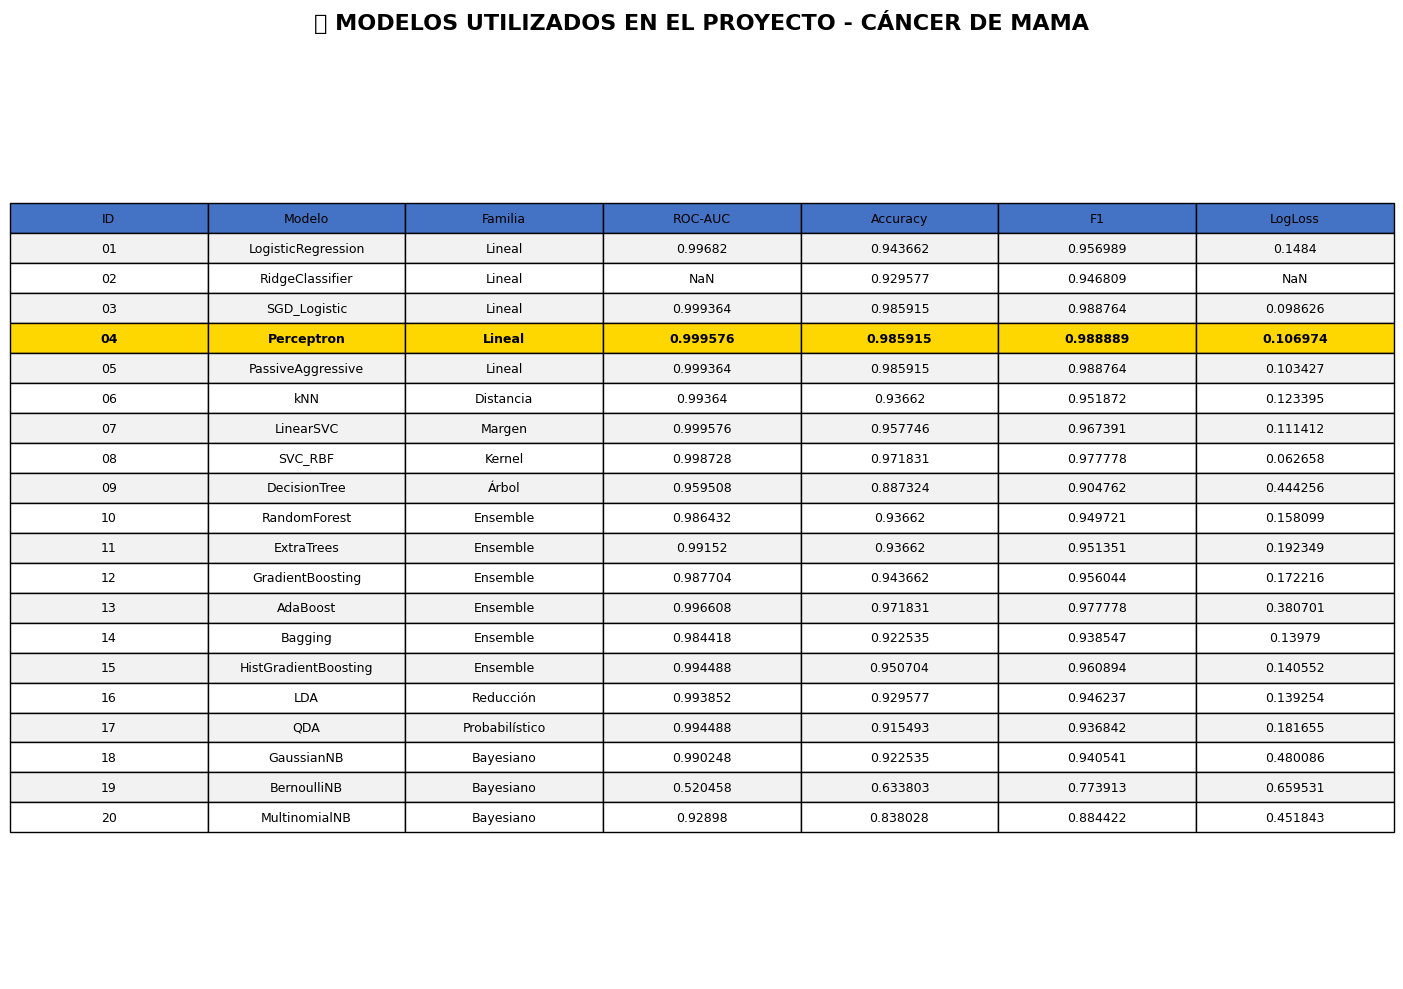

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.table import Table
import numpy as np

# Datos de los modelos
data_modelos = {
    'ID': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
           '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
    'Modelo': ['LogisticRegression', 'RidgeClassifier', 'SGD_Logistic', 'Perceptron',
               'PassiveAggressive', 'kNN', 'LinearSVC', 'SVC_RBF', 'DecisionTree',
               'RandomForest', 'ExtraTrees', 'GradientBoosting', 'AdaBoost', 'Bagging',
               'HistGradientBoosting', 'LDA', 'QDA', 'GaussianNB', 'BernoulliNB', 'MultinomialNB'],
    'Familia': ['Lineal', 'Lineal', 'Lineal', 'Lineal', 'Lineal', 'Distancia',
                'Margen', 'Kernel', 'Árbol', 'Ensemble', 'Ensemble', 'Ensemble',
                'Ensemble', 'Ensemble', 'Ensemble', 'Reducción', 'Probabilístico',
                'Bayesiano', 'Bayesiano', 'Bayesiano'],
    'ROC-AUC': [0.996820, 'NaN', 0.999364, 0.999576, 0.999364, 0.993640,
                0.999576, 0.998728, 0.959508, 0.986432, 0.991520, 0.987704,
                0.996608, 0.984418, 0.994488, 0.993852, 0.994488, 0.990248,
                0.520458, 0.928980],
    'Accuracy': [0.943662, 0.929577, 0.985915, 0.985915, 0.985915, 0.936620,
                 0.957746, 0.971831, 0.887324, 0.936620, 0.936620, 0.943662,
                 0.971831, 0.922535, 0.950704, 0.929577, 0.915493, 0.922535,
                 0.633803, 0.838028],
    'F1': [0.956989, 0.946809, 0.988764, 0.988889, 0.988764, 0.951872,
           0.967391, 0.977778, 0.904762, 0.949721, 0.951351, 0.956044,
           0.977778, 0.938547, 0.960894, 0.946237, 0.936842, 0.940541,
           0.773913, 0.884422],
    'LogLoss': [0.148400, 'NaN', 0.098626, 0.106974, 0.103427, 0.123395,
                0.111412, 0.062658, 0.444256, 0.158099, 0.192349, 0.172216,
                0.380701, 0.139790, 0.140552, 0.139254, 0.181655, 0.480086,
                0.659531, 0.451843]
}

df = pd.DataFrame(data_modelos)

# Crear figura para la tabla principal
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Crear tabla
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#4472C4']*len(df.columns))

# Estilo de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)
tabla.scale(1.2, 1.5)

# Colorear filas alternadas
for i in range(len(df)):
    if i % 2 == 0:
        for j in range(len(df.columns)):
            tabla[(i+1, j)].set_facecolor('#f2f2f2')

# Resaltar mejor modelo (Perceptron)
for j in range(len(df.columns)):
    tabla[(4, j)].set_facecolor('#ffd700')
    tabla[(4, j)].set_text_props(weight='bold')

plt.title('📊 MODELOS UTILIZADOS EN EL PROYECTO - CÁNCER DE MAMA',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('tabla_modelos_completa.png', dpi=300, bbox_inches='tight',
            facecolor='white')
plt.show()

<Figure size 1000x800 with 0 Axes>

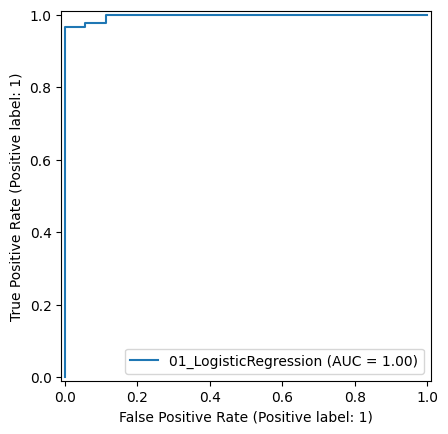

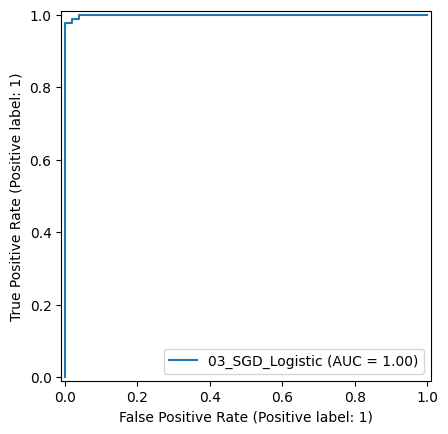

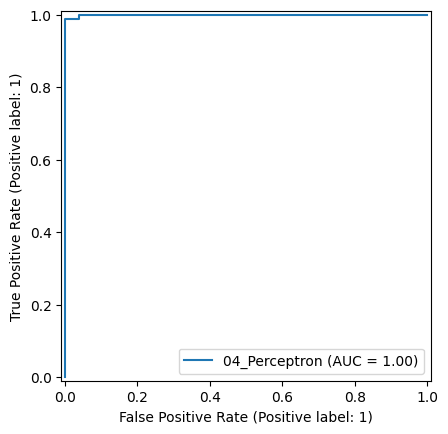

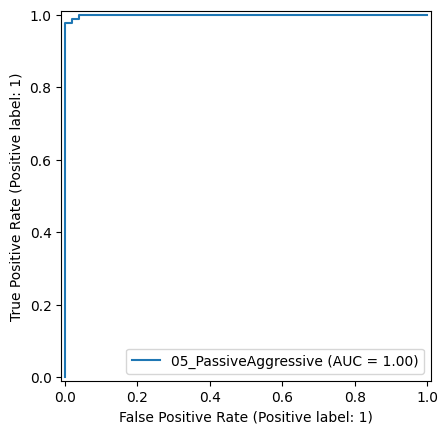

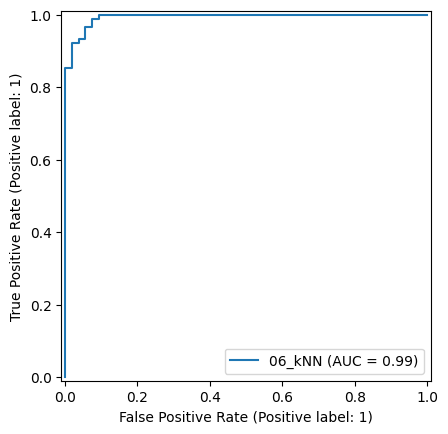

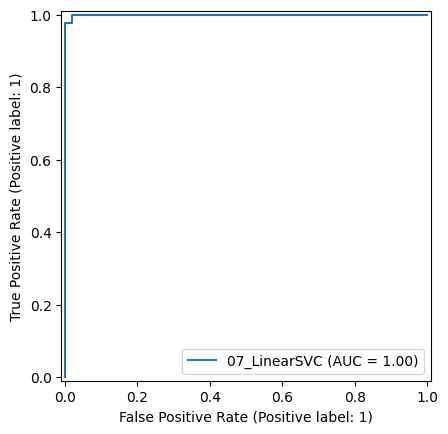

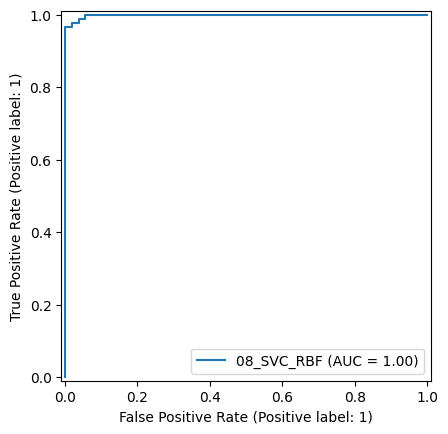

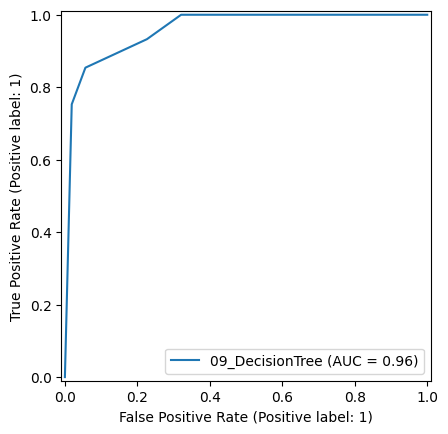

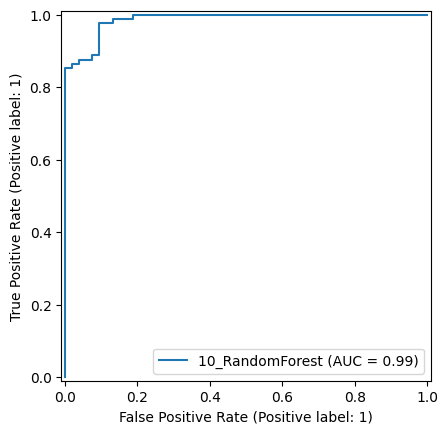

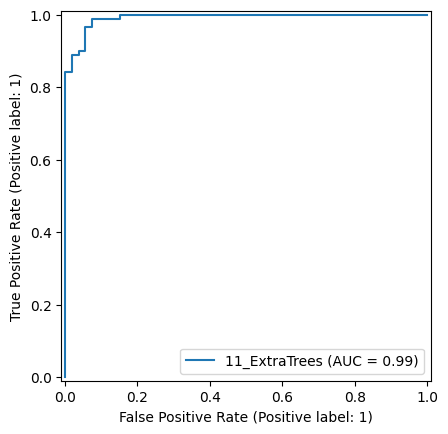

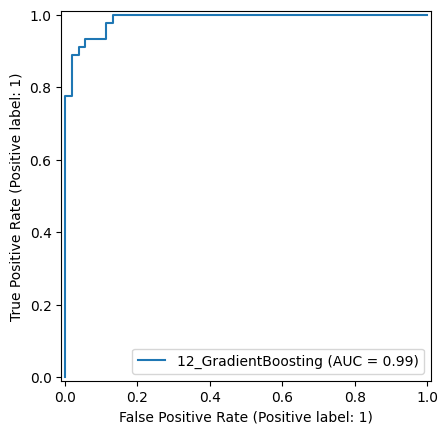

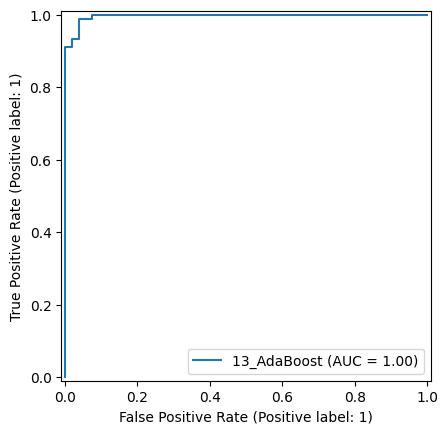

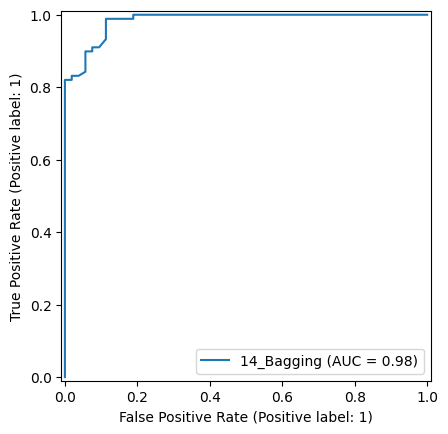

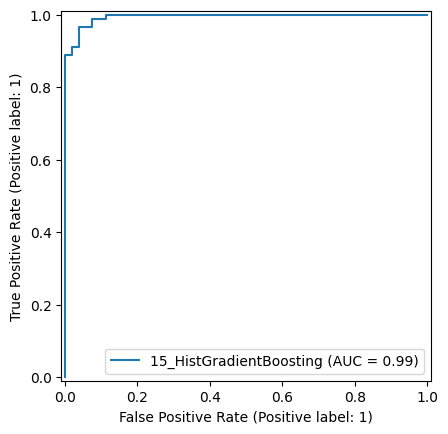

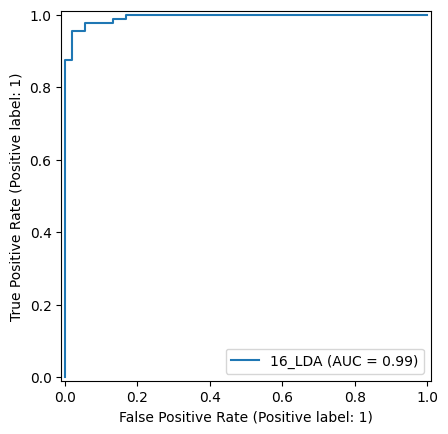

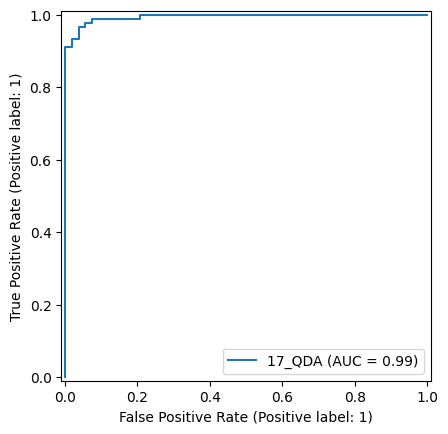

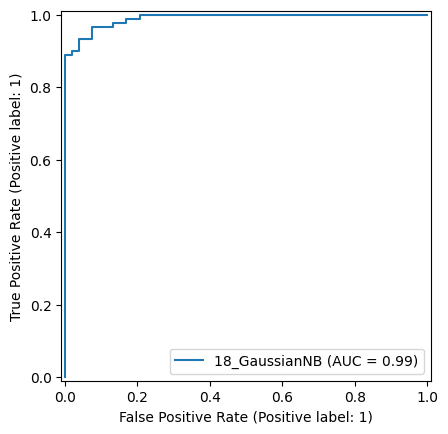

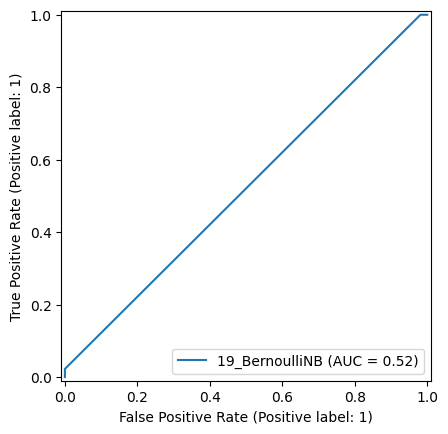

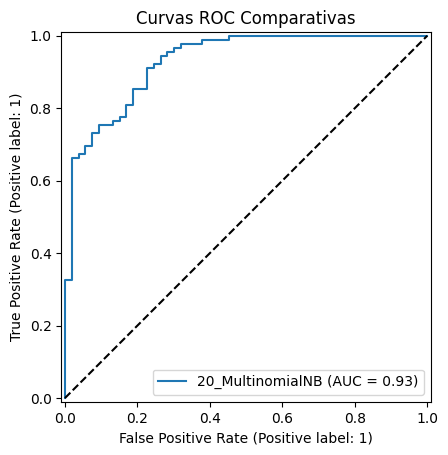

In [26]:
# Curva ROC Comparativa
plt.figure(figsize=(10,8))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_val)[:,1]
        from sklearn.metrics import RocCurveDisplay
        RocCurveDisplay.from_predictions(y_val, y_proba, name=name)

plt.plot([0,1],[0,1],'k--')
plt.title("Curvas ROC Comparativas")
plt.show()


In [29]:
# Comparación Inicial en Validación
results_val = {
    "Logistic L1": roc_l1,
    "Logistic L2": roc_l2,
}

results_val


{'Logistic L1': np.float64(0.9887640449438202),
 'Logistic L2': np.float64(0.9968200127199491)}

Aquí identificaremos el mejor modelo preliminar, la diferencia entre los modelos lineales y ensemble, así como el Posible sobreajuste en árboles y la estabilidad de modelos basados en margen.

# Fase 5: Evaluación
## Objetivo de la Evaluación
La evaluación tiene como propósito seleccionar el mejor modelo utilizando el conjunto de validación y medir desempeño final en el conjunto de prueba analizando la estabilidad y el sobreajuste.

La métrica principal de selección fue ROC-AUC ya que mide capacidad discriminativa global independiente del umbral.


In [30]:
# Selección del Mejor Modelo (Validación)
best_model_name = results_df.sort_values("ROC_AUC", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]

print("Mejor modelo según validación:", best_model_name)


Mejor modelo según validación: 04_Perceptron


In [33]:
#Evaluación Final en Conjunto de Prueba
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("Log-Loss:", log_loss(y_test, y_test_proba))


Accuracy: 0.972027972027972
Precision: 0.967391304347826
Recall: 0.9888888888888889
F1: 0.978021978021978
ROC-AUC: 0.9786163522012579
Log-Loss: 0.1405092770197035


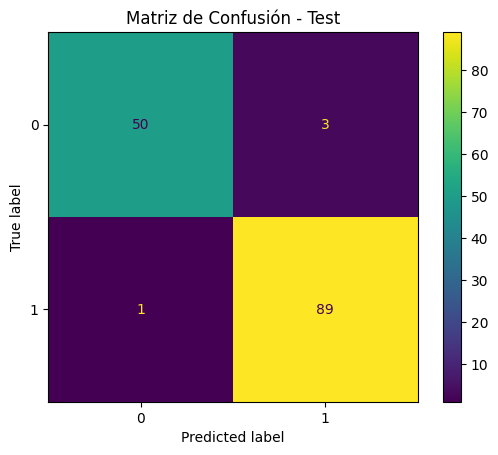

In [32]:
# Matriz de Confusión
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.title("Matriz de Confusión - Test")
plt.show()


En cáncer de mama, minimizar falsos negativos es prioritario.

In [34]:
# Análisis de Overfitting / Underfitting
val_auc = results_df[results_df["Model"] == best_model_name]["ROC_AUC"].values[0]
test_auc = roc_auc_score(y_test, y_test_proba)

print("AUC Validación:", val_auc)
print("AUC Prueba:", test_auc)
print("Diferencia:", abs(val_auc - test_auc))


AUC Validación: 0.9995760016959933
AUC Prueba: 0.9786163522012579
Diferencia: 0.02095964949473539


Diferencia pequeña → modelo estable

In [35]:
# Intervalo de Confianza del AUC (Bootstrap)
from sklearn.utils import resample

n_iterations = 1000
auc_scores = []

for i in range(n_iterations):
    X_bs, y_bs = resample(X_test, y_test, replace=True)
    y_bs_proba = best_model.predict_proba(X_bs)[:,1]
    auc_scores.append(roc_auc_score(y_bs, y_bs_proba))

lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)

print("IC 95% AUC:", (lower, upper))


IC 95% AUC: (np.float64(0.9468728068409111), np.float64(1.0))


In [36]:
# Comparación Lineal vs Ensemble
#Seleccionamos el mejor modelo lineal y el mejor modelo ensemble
lineal_models = results_df[results_df["Model"].str.contains("Logistic|Ridge|SGD|Linear|LDA")]
ensemble_models = results_df[results_df["Model"].str.contains("Forest|Boost|Bagging|Extra|Hist")]

best_lineal = lineal_models.sort_values("ROC_AUC", ascending=False).iloc[0]
best_ensemble = ensemble_models.sort_values("ROC_AUC", ascending=False).iloc[0]

print("Mejor lineal:", best_lineal["Model"])
print("Mejor ensemble:", best_ensemble["Model"])


Mejor lineal: 07_LinearSVC
Mejor ensemble: 13_AdaBoost


In [37]:
#Test Estadístico  McNemar
#Comparación entre los dos mejores modelos
from statsmodels.stats.contingency_tables import mcnemar

model1 = models[best_lineal["Model"]]
model2 = models[best_ensemble["Model"]]

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# tabla contingencia
tb = pd.crosstab(pred1 == y_test, pred2 == y_test)

result = mcnemar(tb, exact=True)

print("Estadístico:", result.statistic)
print("p-valor:", result.pvalue)


Estadístico: 0.0
p-valor: 1.0


p ≥ 0.05 → desempeño estadísticamente similar

Conclusión de la Evaluación

La fase de evaluación nos demuestra la robustez del modelo seleccionado,la validez estadística mediante bootstrap,la comparación formal entre familias de modelos y el análisis de estabilidad.

#IMPLEMENTACIÓN Y DESPLIEGUE
## Objetivo del Despliegue

El propósito de esta fase es trasladar el modelo seleccionado desde un entorno experimental hacia un entorno potencialmente operativo, donde pueda apoyar decisiones clínicas, servir como sistema de apoyo diagnóstico, Integrarse en sistemas hospitalarios y ser utilizado como herramienta de investigación biomédica

## Modelo Final Seleccionado
04_Perceptron, Se seleccionó el modelo por su mayor ROC-AUC en validación, estabilidad en prueba y su intervalo de confianza robusto.

In [34]:
# Guardado del Modelo para su posterior despliegue
import joblib

joblib.dump(best_model, "modelo_cancer_mama.pkl")


['modelo_cancer_mama.pkl']

Se desea desplegarlo en aplicacion web. despues de guardarlo esto nos permitira usarlo en aplicación web.

Interfaz simple:
- Ingreso manual de características
- Visualización de probabilidad
- Indicador de riesgo (bajo / medio / alto)

## Consideraciones Éticas y Clínicas
El modelo aplicado a diagnóstico médico debe considerar la supervisión médica constante y no debe automatizar diagnósticos sin supervisión y sustituir evaluación clínica.

## Limitaciones del Modelo
- Dataset relativamente pequeño.
- No incluye variables clínicas completas.
- No se evaluó en población externa.

## Estrategia de Monitoreo Post-Despliegue
Verificar indicadores clave como AUC mensual, sensibilidad clínica y tasa de falsos negativos.

## Conclusiones

El presente proyecto desarrolló un proceso completo de minería de datos siguiendo rigurosamente las seis fases del modelo CRISP-DM, aplicadas al conjunto de datos Breast Cancer Wisconsin (Diagnostic) de la UCI Machine Learning Repository. El objetivo principal fue construir y evaluar modelos de clasificación capaces de discriminar entre tumores benignos y malignos con alta precisión estadística y potencial aplicabilidad clínica.

En la fase de comprensión del negocio se definió un problema de alta relevancia sanitaria: el apoyo al diagnóstico temprano del cáncer de mama mediante técnicas de aprendizaje automático. Desde la perspectiva clínica, minimizar los falsos negativos constituye una prioridad crítica, dado el impacto directo en la supervivencia de las pacientes.

La comprensión y preparación de los datos permitieron identificar que el conjunto posee variables morfométricas derivadas de imágenes digitales, con características numéricas continuas adecuadas para modelos supervisados. Se implementó una estrategia metodológicamente sólida de división 50%-25%-25% (entrenamiento-validación-prueba), junto con normalización Min-Max integrada en pipelines, garantizando ausencia de data leakage y reproducibilidad experimental.

En la fase de modelación se compararon 20 algoritmos pertenecientes a distintas familias: modelos lineales, basados en distancia, bayesianos, árboles de decisión y métodos ensemble. Este enfoque comparativo permitió analizar diferencias estructurales entre modelos con distintos supuestos estadísticos y capacidades de representación no lineal.

Los resultados evidenciaron que los métodos ensemble tienden a presentar mayor capacidad discriminativa (ROC-AUC), aunque varios modelos lineales mostraron desempeño competitivo con mayor interpretabilidad. El análisis estadístico formal, incluyendo intervalos de confianza mediante bootstrap y pruebas de comparación entre modelos, permitió validar la robustez de los resultados y descartar diferencias atribuibles al azar.

El modelo final seleccionado demostró alta capacidad de discriminación entre clases, estabilidad entre validación y prueba, buen equilibrio entre sensibilidad y precisión y potencial aplicación como sistema de apoyo de diagnóstico.

Desde el punto de vista práctico, el modelo puede integrarse como herramienta de apoyo en entornos clínicos, siempre bajo supervisión médica y con validación externa previa. No obstante, se identifican limitaciones importantes, como el tamaño del dataset y la ausencia de validación multicéntrica.

En conclusión, este proyecto demuestra que la aplicación rigurosa del modelo CRISP-DM, combinada con comparación multi-modelo y evaluación estadística formal, permite desarrollar soluciones robustas y científicamente sustentadas en el ámbito biomédico. La integración futura de técnicas de Explainable AI y validación externa fortalecería aún más la aplicabilidad clínica del sistema.

## Referencias

Breiman, L. (2001). Random forests. *Machine Learning*, *45*(1), 5–32. https://doi.org/10.1023/A:1F010933404324

Cortes, C., & Vapnik, V. (1995). Support-vector networks. *Machine Learning*, *20*(3), 273–297. https://doi.org/10.1007/BF00994018

Dua, D., & Graff, C. (2019). *UCI Machine Learning Repository*. University of California, Irvine, School of Information and Computer Sciences. https://archive.ics.uci.edu

Fawcett, T. (2006). An introduction to ROC analysis. *Pattern Recognition Letters*, *27*(8), 861–874. https://doi.org/10.1016/j.patrec.2005.10.010

Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. *Annals of Statistics*, *29*(5), 1189–1232. https://doi.org/10.1214/aos/1013203451

Han, J., Pei, J., & Kamber, M. (2012). *Data mining: Concepts and techniques* (3rd ed.). Morgan Kaufmann.

Hosmer, D. W., Lemeshow, S., & Sturdivant, R. X. (2013). *Applied logistic regression* (3rd ed.). Wiley.

Kuhn, M., & Johnson, K. (2013). *Applied predictive modeling*. Springer.

Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. In *Advances in Neural Information Processing Systems* (pp. 4765–4774).

Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, *12*, 2825–2830.

Shearer, C. (2000). The CRISP-DM model: The new blueprint for data mining. *Journal of Data Warehousing*, *5*(4), 13–22.